In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_books=pd.read_csv("C:/Users/psind/Downloads/archive/books_data.csv")
df_rating=pd.read_csv("C:/Users/psind/Downloads/archive/Books_rating.csv")

In [6]:
df_books.head()


,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [7]:
df_rating.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [8]:
#Null values for books data

df_books.isnull().sum()

Title                 1
description       68442
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64

In [9]:
#Null values for booking rating

df_rating.isnull().sum()

Id                          0
Title                     208
Price                 2518829
User_id                561787
profileName            561905
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64

In [10]:
#datatypes of the columns in csv file

print(df_books.dtypes)
print(df_rating.dtypes)

Title             object
description       object
authors           object
image             object
previewLink       object
publisher         object
publishedDate     object
infoLink          object
categories        object
ratingsCount     float64
dtype: object
Id                     object
Title                  object
Price                 float64
User_id                object
profileName            object
review/helpfulness     object
review/score          float64
review/time             int64
review/summary         object
review/text            object
dtype: object


In [11]:
#statistics for books 

df_books.describe()

,ratingsCount
count,49752.000000
mean,21.252975
std,201.340431
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,4895.000000


In [12]:
#statistics

df_rating.describe()

,Price,review/score,review/time
count,481171.000000,3.000000e+06,3.000000e+06
mean,21.762656,4.215289e+00,1.132307e+09
std,26.206541,1.203054e+00,1.493202e+08
min,1.000000,1.000000e+00,-1.000000e+00
25%,10.780000,4.000000e+00,9.999072e+08
50%,14.930000,5.000000e+00,1.128298e+09
75%,23.950000,5.000000e+00,1.269130e+09
max,995.000000,5.000000e+00,1.362355e+09


In [14]:
merge_df= pd.merge(df_books,df_rating, on='Title')

In [16]:
#List of Top publishers based on review score

publisher_avgrating = merge_df.groupby('publisher')['review/score'].mean().reset_index()

top_publishers =publisher_avgrating.sort_values(by='review/score', ascending=False).head(10)

print(top_publishers)


                                               publisher  review/score
11184                     Philadelphia : J.B. Lippincott           5.0
3667                            Dan Robbins Incorporated           5.0
3664                   Damien-Dutton Society for Leprosy           5.0
8208                                    Loguez Ediciones           5.0
12513                   Saanichton, B.C. : Hancock House           5.0
14457                             Twin Lights Publishers           5.0
14458                               Twin Lion Publishers           5.0
8211   London (England) : Routledge & Kegan Paul ; Ne...           5.0
12512                                     SVM Publishing           5.0
8213                                      London : Allan           5.0


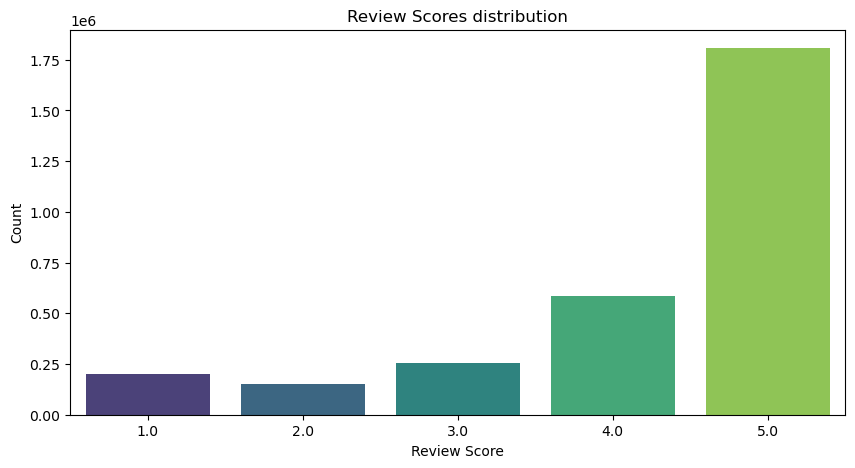

In [13]:
#Count of review scores given to Books

plt.figure(figsize=(10, 5))
sns.countplot(data=df_rating, x='review/score', palette='viridis')
plt.title('Review Scores distribution')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()

This chart shows the count of books for different review scores ranging from 1 to 5. Majority of books received a review score of 5.

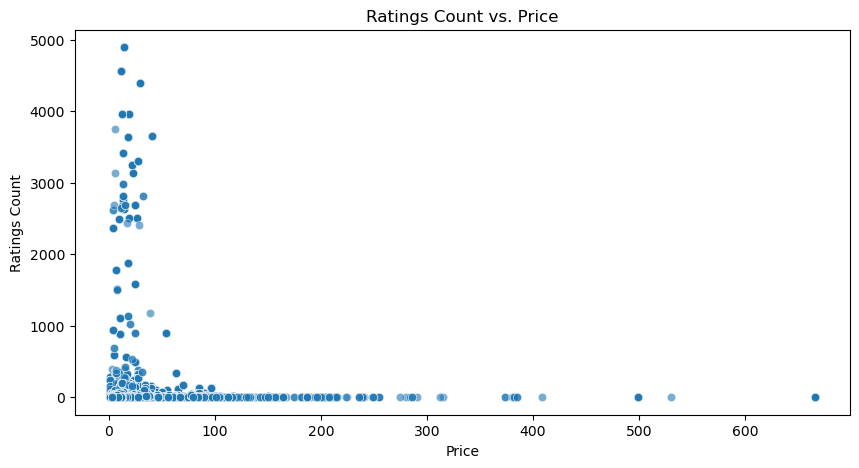

In [15]:
# Price vs Rating Count

plt.figure(figsize=(10, 5))
sns.scatterplot(data=merge_df, x='Price', y='ratingsCount', alpha=0.6)
plt.title('Ratings Count vs. Price')
plt.xlabel('Price')
plt.ylabel('Ratings Count')
plt.show()

Price and Rating Count relationship is not linear and inconsistent as it shows that if price is low, the book ratingscount is high and if price is high , ratingcount is low

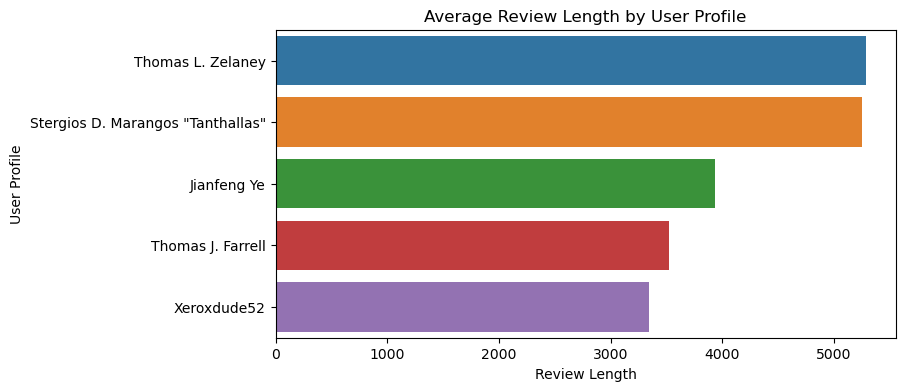

In [31]:
#review length based on user profile

df_sample = merge_df.sample(frac=0.1, random_state=1)
df_sample['review_length'] =df_sample['review/text'].str.split().str.len()
reviewlength_user = df_sample.groupby('profileName')['review_length'].mean().reset_index()
top_users = reviewlength_user.nlargest(5, 'review_length')
plt.figure(figsize=(8,4))
sns.barplot(x='review_length', y='profileName', data=top_users)
plt.title('Average Review Length by User Profile')
plt.xlabel('Review Length')
plt.ylabel('User Profile')
plt.show()

This horizontal barplots shows the maximum review length given by the top 5 users.

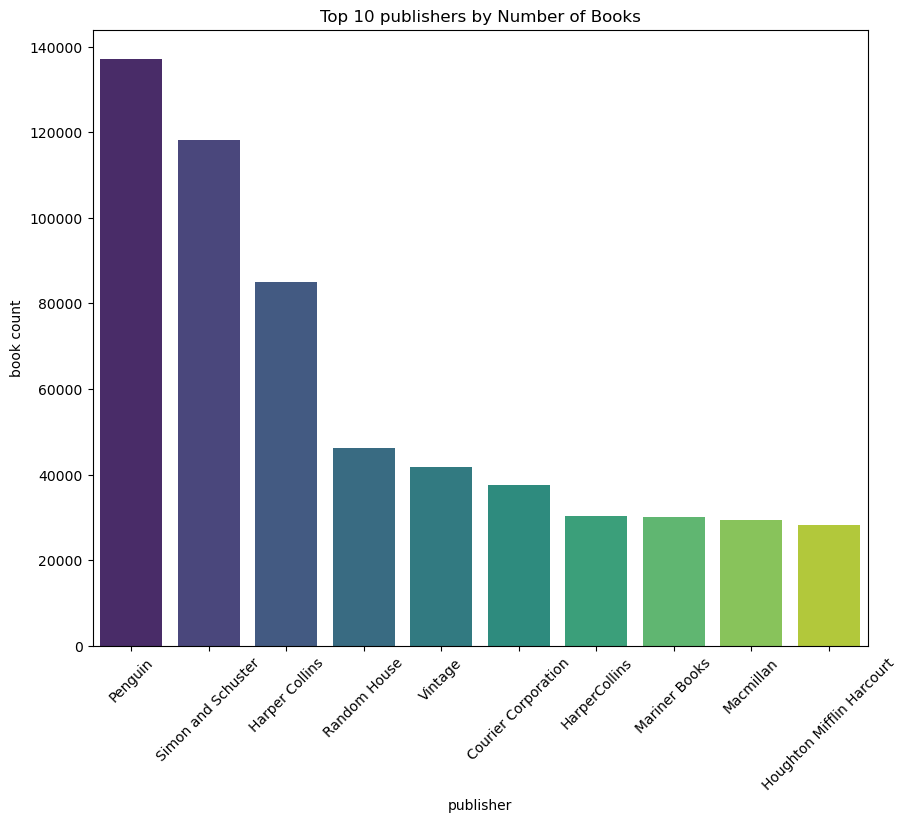

In [73]:
#Top publishers based on book count published

publisher_count = merge_df['publisher'].value_counts().reset_index()
publisher_count.columns = ['publishers', 'book_count']

top_publishers = publisher_count.head(10)
plt.figure(figsize=(10, 8))
sns.barplot(data=top_publishers, x='publishers', y='book_count', palette='viridis')
plt.title('Top 10 publishers by Number of Books')
plt.xlabel('publisher')
plt.ylabel('book count')
plt.xticks(rotation=45)
plt.show()

This barcharts shows the total 10 publishers with the book count that they have published.

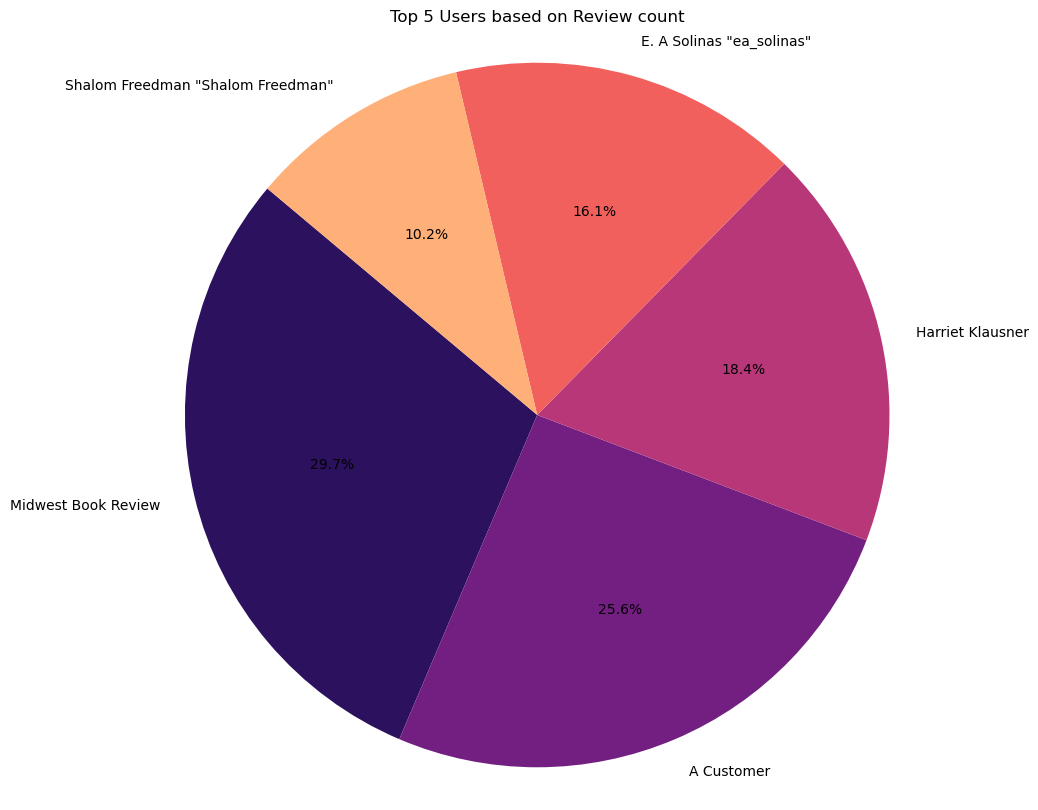

In [19]:
#top users based on the count of review provided

user_review = merge_df['profileName'].value_counts().reset_index()
user_review.columns = ['user', 'review_count']
top_users = user_review.head()
plt.figure(figsize=(10, 10))
plt.pie(top_users['review_count'], labels=top_users['user'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("magma", n_colors=len(top_users)))
plt.title('Top 5 Users based on Review count')
plt.axis('equal')
plt.show()

This pie charts shows the top 5 users based on their review count given.each slice and percentage shows the number of reviews given by that particular user

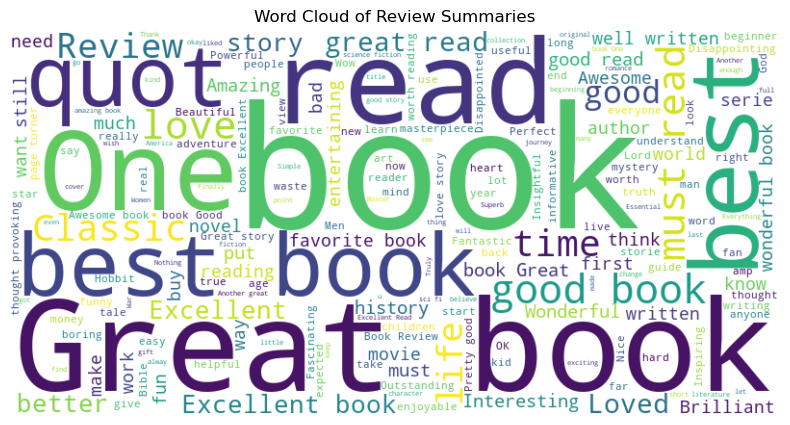

In [47]:
#wordcloud to show the review summary giveen by users

from wordcloud import WordCloud

summary_text = ' '.join(merge_df['review/summary'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Summaries')
plt.show()

This wordcloud visualization shows the most common words used in the review summary.Size of the word shows how frequently the word is used in the review summary

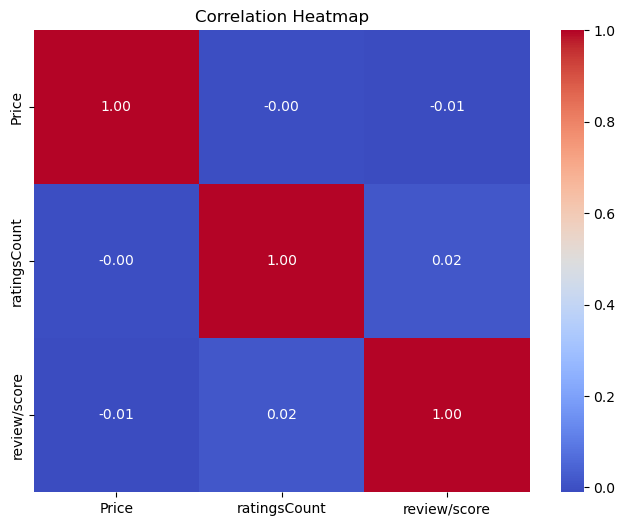

In [70]:
#HeatMap between Price,ratincount and reviewscore

correlation = merge_df[['Price', 'ratingsCount', 'review/score']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

From Heatmap it is observed that Price, ratingsCount and review/score are not directly related to each other. Price factor does not affect the books ratingcount and review/score

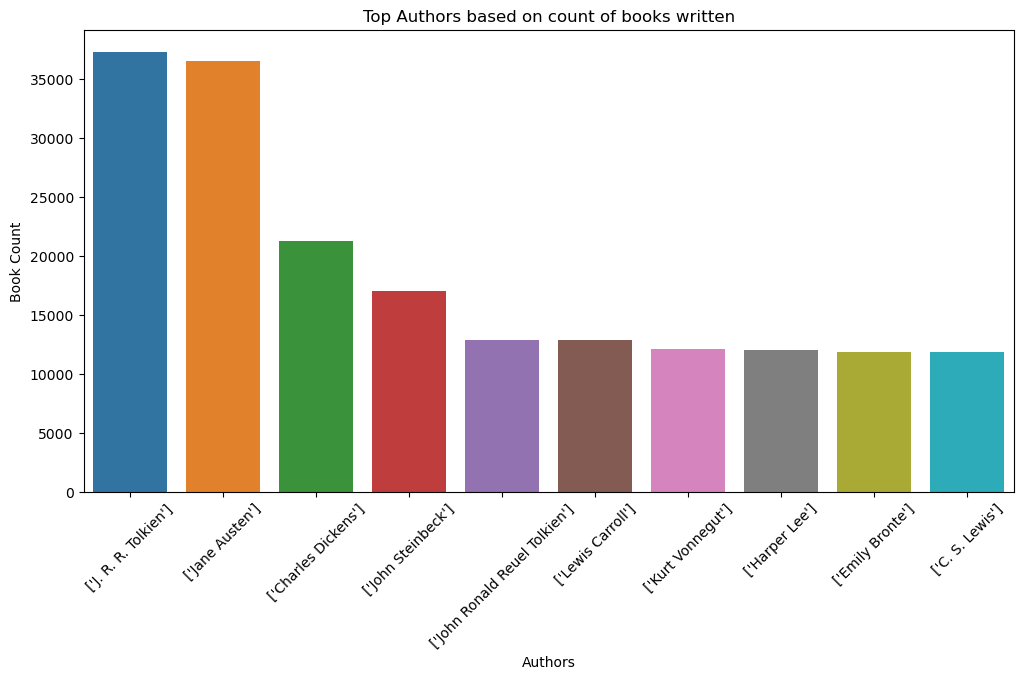

In [76]:
#Top authors and count of books written

top_authors = merge_df['authors'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_authors.index, y=top_authors.values)
plt.title('Top Authors based on count of books written')
plt.xlabel('Authors')
plt.ylabel('Book Count')
plt.xticks(rotation=45)
plt.show()

This Barchart shows the Top 10 authors with the count of the books written

In [59]:
#relation between Book Categories and Price

category_price = merge_df.groupby('categories')['Price'].agg(['mean', 'count']).reset_index()

category_price.columns = ['Category', 'Average Price','Count of Books']

#sort by average price
category_price = category_price_summary.sort_values(by='Average Price', ascending=False)
category_price = category_price_summary[category_price_summary['Average Price'].notna()]
print(category_price_summary)

                          Category  Average Price  Count of Books
1920                 ['Bioethics']         807.30               1
10168      ['Stress (Physiology)']         800.00               2
390              ['Africa, North']         568.52               1
1210   ['Artificial intelligence']         505.00               1
6990         ['Japanese language']         495.00               6
...                            ...            ...             ...
5250                     ['Faith']           1.50              27
10620         ['Vienna (Austria)']           1.49               5
2247    ['British Virgin Islands']           1.09               3
2890               ['Child abuse']           1.00               7
10726                ['Web sites']           1.00               1

[2253 rows x 3 columns]


In [66]:
#count of books published per year

merge_df['publishedDate'] = pd.to_datetime(merge_df['publishedDate'],)
merge_df['publishedYear'] = merge_df['publishedDate'].dt.year

books_per_year =  merge_df['publishedYear'].value_counts().reset_index()
books_per_year.columns = ['Year', 'Count']

books_per_year = books_per_year.sort_values(by='Year', ascending=False)

print(books_per_year)

       Year  Count
260  2025.0      4
177  2022.0    135
63   2021.0   2952
76   2020.0   1747
45   2019.0   5661
..      ...    ...
272  1684.0      2
250  1682.0      7
300  1681.0      1
254  1680.0      5
273  1679.0      2

[303 rows x 2 columns]
